# Projet en POO

### Commençons par comprendre le schéma suivant décrivant le projet à implémenter

In [63]:
# Good link 

# https://ehmatthes.github.io/pcc/solutions/chapter_9.html

# https://realpython.com/inheritance-composition-python/#what-are-inheritance-and-composition 

# https://stackoverflow.com/questions/69386502/login-example-accessing-class-instance-with-user-input

# https://sparkbyexamples.com/pandas/how-to-append-row-to-pandas-dataframe/#:~:text=Append%20Dict%20as%20Row%20to,will%20get%20you%20an%20error.




In [77]:
#importons toutes les librairies necessaires.

from IPython import display
from datetime import timedelta, datetime
import numbers
import itertools
import datetime
import sqlite3 
from sqlite3 import connect
import pandas as pd

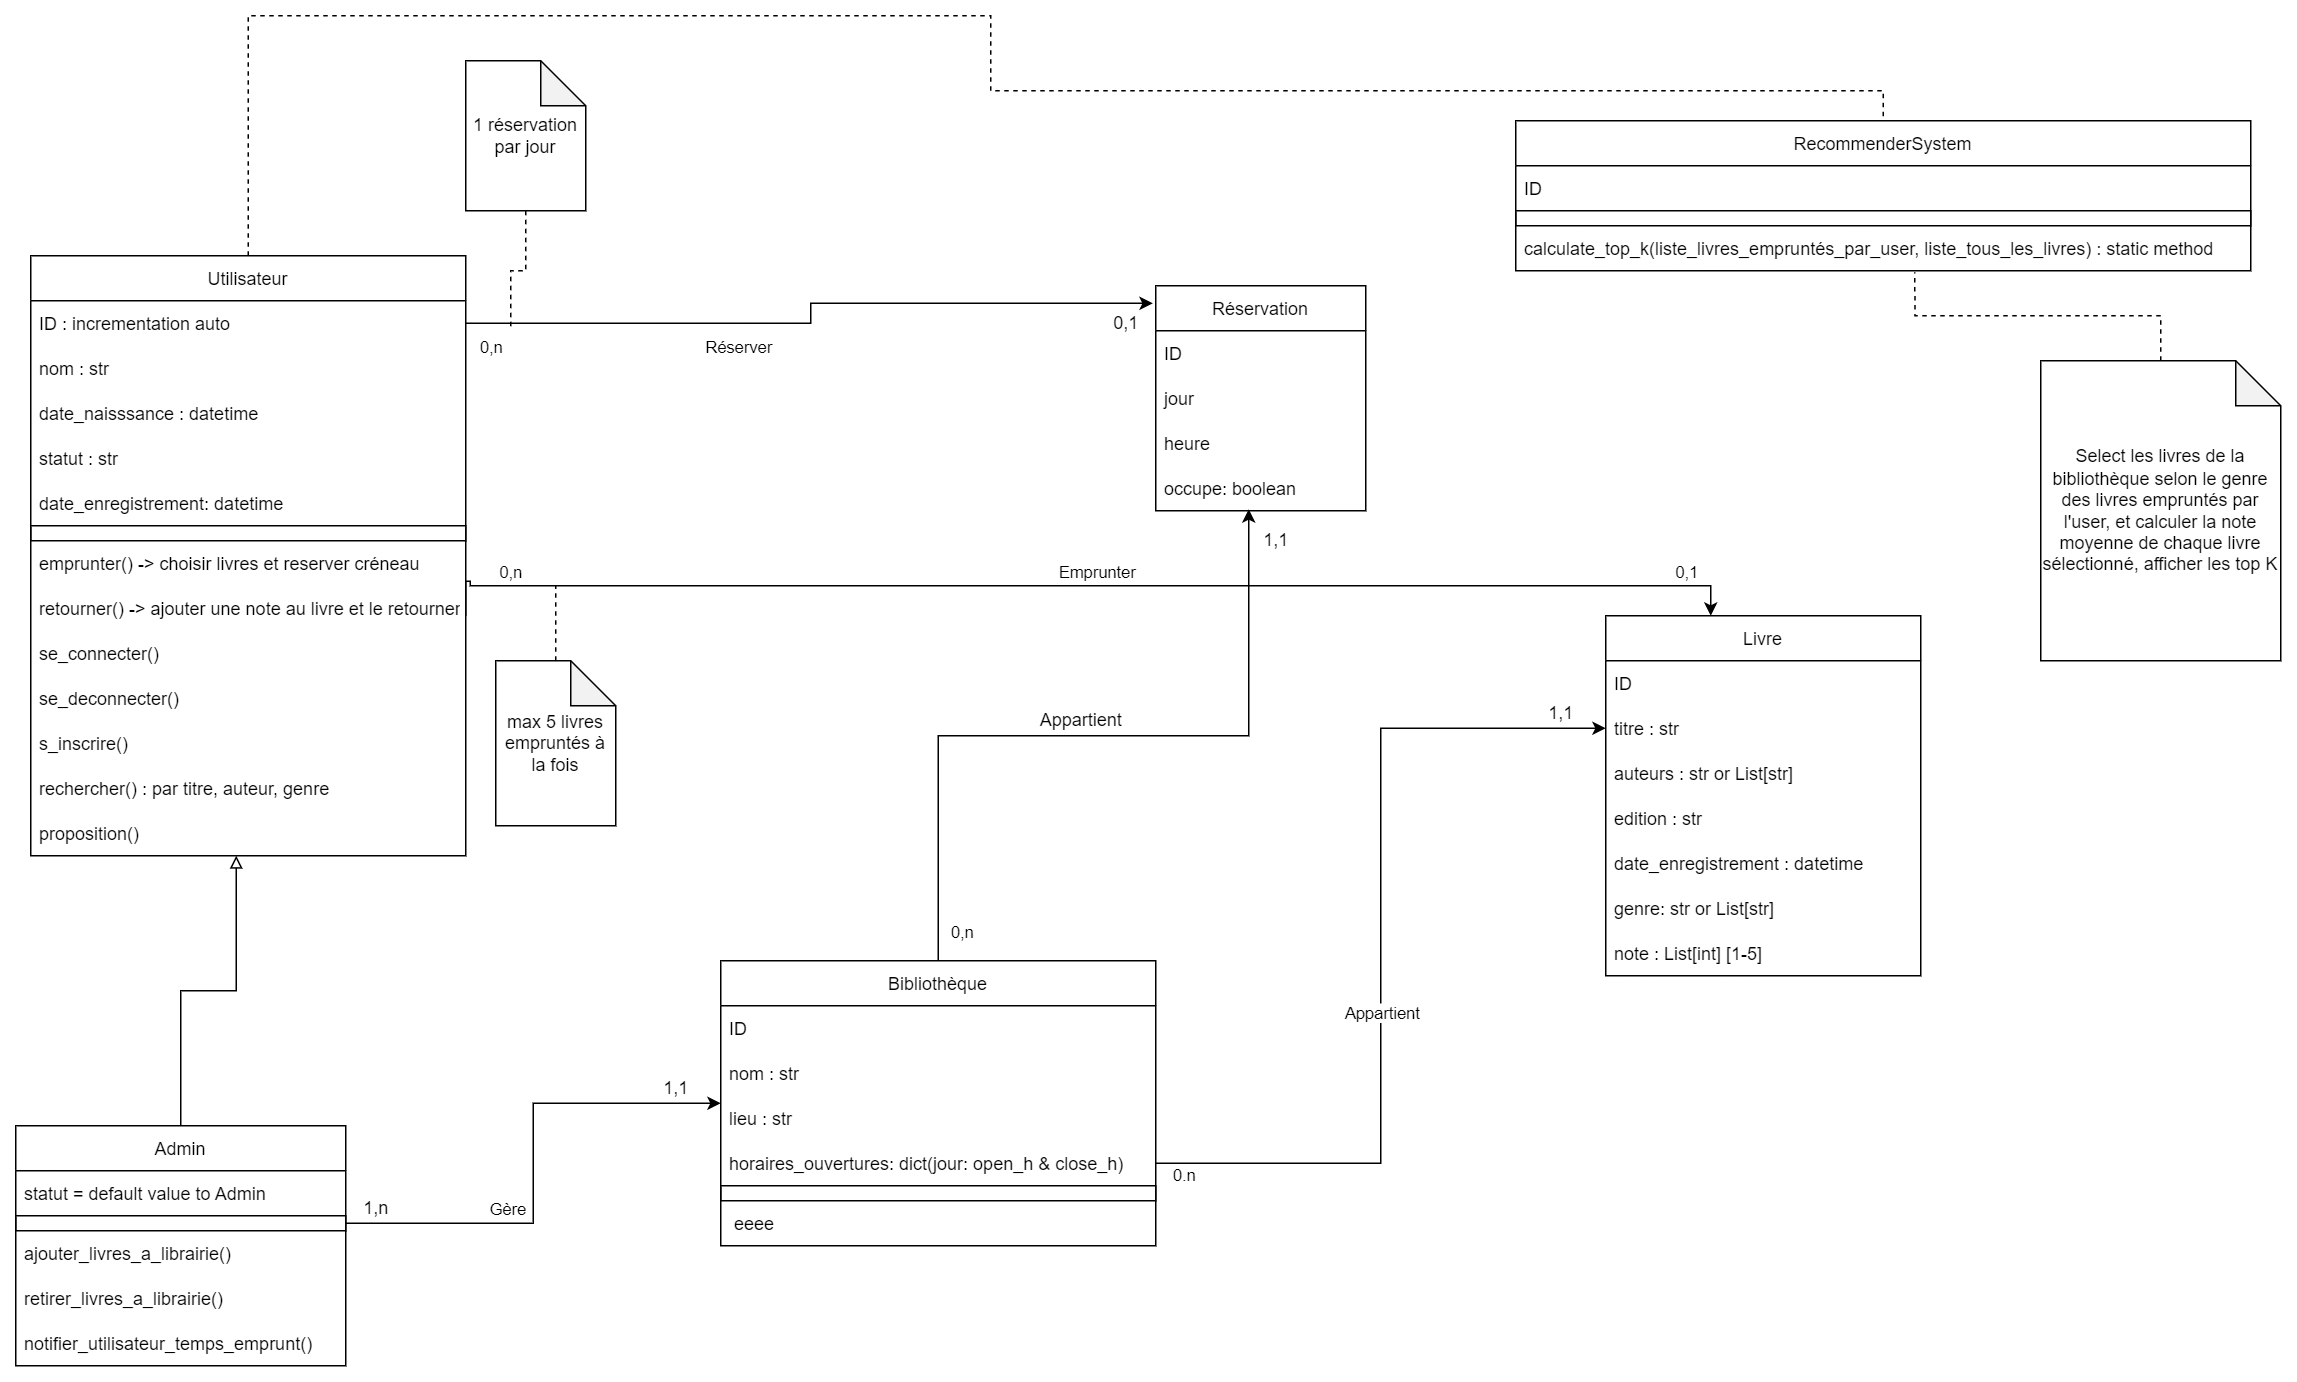

In [78]:
display.Image("/Users/djibril/Desktop/PROJET_JOR_DJI/image.png")

In [90]:
connexion = sqlite3.connect('acs.sqlite') 

UTILIS = pd.read_sql('SELECT * FROM Utilisateur', connexion)
BIBLIO = pd.read_sql('SELECT * FROM Bibliotheque', connexion)
LIVR = pd.read_sql('SELECT * FROM Livre', connexion)
ID_Starter = itertools.count(25)
Utilisateur_ = UTILIS["nom"]
mot_de_passe_ = UTILIS["mon_de_passe"]
LIVRE_ = LIVR["titre"].tolist()

In [91]:
UTILIS

,ID,nom,date_naissance,statut,date_enregistrement,mon_de_passe
0,1,Michael03,12/03/2001,TRUE,02/02/2018,34!2
1,2,Isaac34,01/02/1991,FALSE,21/11/2016,dl$%
2,3,Jordan30,23/04/1994,TRUE,14/07/2008,jhf*
3,4,Ali01,12/09/1998,FALSE,14/04/2004,dddd
4,5,Issa77,25/12/1997,FALSE,16/012/2002,"#lm,"
5,6,Djibril38,20/08/1993,TRUE,14/07/2008,wd34
6,7,Ivette24,22/10/1990,TRUE,06/10/2021,jg^4
7,8,Natacha04,28/04/1991,FALSE,27/03/2011,hdf4
8,9,Sarah91,18/05/1987,TRUE,15/07/2022,fgu#
9,10,Rose16,30/04/1999,FALSE,19/05/2013,sjg!


In [82]:
class FuseauHoraire:
    """ Cette classe nous permettra de gerer tout ce qui est en rapport avec le temps """

    def __init__(self, nom, decalage_heure, decalage_minute):
        """

        Args:
            nom (str): nom du fuseau horaire
            decalage_heure (int): le decalage horaire de -12:00 a +14:00
            decalage_minute (int): le decalage en minute de -59 a +59
        """
        
        # Condition de validation du nom
        if nom is None or len(str(nom).strip()) == 0:
            raise ValueError('Le nom du fuseau ne peut pas etre vide.')
        
        self._nom = str(nom).strip()

        # Condition de validation du decalage horaire
        if not isinstance(decalage_heure, numbers.Integral):
            raise ValueError('Heure doit etre un entier.')

        # Condition de validation du decalage minute
        if not isinstance(decalage_minute, numbers.Integral):
            raise ValueError('Minute doitt etre un entier')

        if decalage_minute < -59 or decalage_minute > 59:
            raise ValueError('les minutes doivent etre entre -59 et 59')

        decalage = timedelta(hours= decalage_heure, minutes = decalage_minute)

        if decalage < timedelta(hours=-12, minutes=0) or decalage > timedelta(hours=14, minutes=0):
            raise ValueError('Le decalage doit etre entre -12:00 et +14:00.')

        
        self._decalage_heure = decalage_heure
        self._decalage_minute = decalage_minute
        self._decalage = decalage

    #Definissons en lecture uniquement (Cad on definit uniquement le getter mais pas le setter)
    @property
    def decalage(self):
        return self._decalage

    @property
    def nom(self):
        return self._nom

    # Definir l'egalite (__eq__) pour comparer deux fuseaux horaires (self et autre)
    def __eq__(self, autre):
        return (isinstance(autre, FuseauHoraire) and 
                self.nom != autre.nom and 
                self._decalage_heure == autre._decalage_heure and
                self._decalage_minute == autre._decalage_minute)

    # La methode de representation qui nous permettra d'afficher
    def __repr__(self):
        return (f"Nom du fuseau horaire ='{self.nom}', "
                f"Decalage horaire={self._decalage_heure}, "
                f"Decalage en minutes={self._decalage_minute})")

In [83]:
# Contenu de l'ensemble des livres
class Livre:
    """Classe mere d'Utilisateur et de Bilbliotheque

    Raises:
        ValueError: _description_

    Returns:
        _type_: _description_
    """
    #record = CheckedOut()

    def __init__(self, ID, titre, auteurs, edition, date_enregistrement, genre, note):
        """_summary_

        Args:
            ID (int): _description_
            titre (str): _description_
            auteurs (str): _description_
            edition (str): _description_
            date_enregistrement (datetime): _description_
            genre (str): _description_
            note (int): _description_
        """
        self.ID = ID
        self.titre = titre
        self.auteurs = auteurs
        self.edtion = edition
        self.date = date_enregistrement
        self.genre = genre
        self.note = note
        #self.livres = set('aaaa', 'bbbb', 'cccc', 'dddd', 'eeee', 'ffff', 'gggg', 'hhhh', 'iiii', 'jjjj', 'kkkk', 'llll', 'mmmm', 'nnnn')
        self.livres = LIVR # ou titre

        

    @property
    def date_enregistrement(self):
        return self._date_enregistrement

    @date_enregistrement.setter
    def date_enregistrement(self, value):
        if not isinstance(value, FuseauHoraire):
            raise ValueError('le fuseau horaire doit être un objet FuseauHoraire valide.')
        self._date_enregistrement = value
        

    def ajouter_livre(self, nouveau_livre):
        self.livres.add(nouveau_livre)

    def display_livres(self):
        if self.livres:
            print("Les livres que nous avons mis à disposition dans notre bibliothèque sont:\n")
            for livre in self.livres:
                print(livre)
        else:
            print("Désolé, nous n'avons pas de livres disponibles à la bibliothèque pour le moment")

    def prendre_livre(self, livre_demandé):
        if livre_demandé in self.livres:
            print(f'''Vous avez maintenant emprunté le livre \"{livre_demandé}\"''')
            self.livres.remove(livre_demandé)
            return True

        else:
            print(f'''Désolé, le livre \"{livre_demandé}\" n'est pas la dans notre bibliothèque pour le moment''')
            return False

In [84]:
class Reservation:
    """Class reservation qui est la classe mere d'Utilisateur et Bibliotheque"""
    def __init__(self, ID_R, jour, heure, occupe):
        """...

        Args:
            ID_R (int): ID de la reservation
            jour (datetime): Jour de la reseration
            heure (datetime): Jour de la reservation
            occupe (boolean): Vrai ou faux
        """
        self.ID_R = ID_R
        self.jour = jour
        self.heure = heure
        self.occupe = occupe



In [85]:
class Utilisateur:
    """ Classe Mere: Cette classe sera considérée comme classe mère d'après la hiérarchie de notre schéma et sera connectée aux classes filles (Reservation), (livre) """
    ID_Starter = itertools.count(25)
    lv = 'A connecter avec la classe livres' # list_des_livres
    nb = 'A connecter avec la classe bibliotheque' # Nom_bibliotheque
    dictionary = {}
    
    def __init__(self, ID, nom, date_naissance, statut: bool, nouveau_nom_utilisateur,  date_enregistre = None):
        #super().__init__(ID, titre, auteurs, edition, date_enregistrement, genre, note)
        """ Nous définissons notre constructeur avec les attributs prédéfinis ainsi que type

        Args:
            ID (int): Identité de l'utilisateur qui sera incrémentée automatiquement
            nom (str): Nom d'utilisateur
            date_naissance (datetime): Qui sera au format defini par datetime
            statut (str): Le statut de l'tilisateur: True = Connecte; False = deconnecte
            date_enregistrement (datetime): Qui sera au format defini par datetime
        """
        # Conditions de validation
        self.nom = nom.title()
        self.nouveau_nom_utilisateur = nouveau_nom_utilisateur
        
        if date_naissance != datetime.datetime.strptime(date_naissance, '%d-%m-%Y').strftime('%d-%m-%Y'):
            raise ValueError('Le format est incorrect, la date doit avoir le format DD-MM-YYYY.')
        
        self._date_naissance = date_naissance

        
        self.statut = statut

        #if nom is None or len(str(nom).strip()) == 0:
            #raise ValueError('Le nom du fuseau ne peut pas etre vide.')
        
        #self._nom = str(nom).strip()


        #if date_enregistrement is None:
        #   date_enregistrement = FuseauHoraire('UTC', 0, 0)
            
        #self.date_enregistrement = date_enregistrement


        self._ID = ID
        self._nom = nom
        self._date_naissaince = date_naissance
        self._statut = statut
        self._date_enregistre = date_enregistre
        #self.info_complet = nom.title() + " " + "et merci de vous être inscrit le" + date_enregistre

        #Compter les Identites des utilisateurs
    def next(self):
        self._ID += 1
        return self._ID

    def ID_count(self):
        new_id = next(Utilisateur.ID_Starter)
        return new_id

    @property
    def nom(self):
        return self._nom

    @nom.setter
    def nom(self, value):
        self.valider_regler_nom('_nom', value, 'Le nom')

    @property
    def date_enregistre(self):
        return self._date_enregistre

    @date_enregistre.setter
    def date_enregistre(self, value):
        if not isinstance(value, FuseauHoraire):
            raise ValueError('le fuseau horaire doit être un objet FuseauHoraire valide.')
        self._date_enregistre = value

    # Je definis cette fonction parce que je vais l'utiliser lus tard et de la meme facon
    def valider_regler_nom(self, properte_nom, value, Nomination):
        if value is None or len(str(value).strip()) == 0:
            raise ValueError(f'{Nomination} ne peut pas etre vide.')
        setattr(self, properte_nom, value)



    # Implementation des methodes

    @staticmethod
    def emprunter(nom_livre):
        if nom_livre not in LIVRE_:
            print("Nous n'avons ce livre dans la bibliothèque")
            print('--------------------------Voici la liste des livres disponibles------------------------------')
            print(LIVRE_)
        else:
            print(f'------------------------Merci davoir un unprunter le livre {nom_livre}---------------------------')
            



    @staticmethod
    def retourner_livre(retourne_livre):
        #dictionary ={} # provisiore
            LIVRE_.append(retourne_livre)
            print("Merci pour le retour du livre. Veuillez visiter à nouveau")
        



    #@staticmethod
    def rechercher(self, tit, aut, gen):
        if tit in self.titre:
            print('Le titre {tit} a été retrouvé')

        elif aut in self.auteurs:
            print("L'auteur {aut} a été retrouvé")
        
        elif gen in self.genre:
            print('le genre {gen} a été retrouvé')

        else:
            print('Vous devez faire la recherche sur (titre), (auteur) ou (genre)')

        


    def se_deconnecter(self):
        
        if self.statut == True:
            statu1 = input("voulez vous vous deconnecter? (Y/N)").lower()
            if statu1 != ("y" or "yes"):
                print("Votre compte est toujours actif")
            else:
                print("Merci de vous être déconnecté")
        else:
            statu2 = input("voulez vous vous deconnecter? (Y/N) Si votre réponse est (Yes) vous allez devoir vous connecter premièrement avant de pouvoir vous deconnecter.").lower()
            if statu2 != ("y" or "yes"):
                print("Pas la peine. Vous n'etes meme pas connecte")
            else:
                se_connecter()


@staticmethod
def proposition():
    print("************** Voici la liste des titres des livre disponibles ***************")
    print(LIVRE_)
    print(f'----------- Nous avons en tout: {len(LIVRE_)}')


def s_inscrire():
    nouveau_nom_utilisateur = input("Choisissez un nom d'utilisateur: ")    
    while nouveau_nom_utilisateur in Utilisateur_:
        nouveau_nom_utilisateur = input("Nom d'utilisateur déjà utilisé; choisissez un autre nom d'utilisateur: ")
    password = ""
    while len(password) != 4:
        password = input("Choisissez un mot de passe à 4 caractères: ")
    nom = input("Entrez votre nom ")
    date_naissance = input("Entrez la date de naissance au format JJ-MM-AAAA? ")
    statut = input("Entrez votre statut (etudiant, salarier, autre, ou confifentiel) ")

    username = Utilisateur(nom, date_naissance, statut, nouveau_nom_utilisateur, password)
    print("Welcome " + username.nom)
    Utilisateur_.append(nouveau_nom_utilisateur)
    print(Utilisateur_)

    more = input("Ajouter un autre utilisateur? (Y/N) ").lower()
    if more != ("n" or "no"):
        s_inscrire()

    
def se_connecter():
    nom_utilisateur = input("Entrez votre nom d'utilisateur:")
    mot_de_passe = input("Entrez votre mot de passe:")
    if nom_utilisateur in Utilisateur_ and mot_de_passe in mot_de_passe_:
        print(f"Bienvenu {nom_utilisateur} vous etes connecte")
    else:
        print("Desole, mot de passe ou nom d_utilisateur incorrect!")

        essai = input("Voulez vous reessayer? (Y/N) ").lower()
        if essai != ("n" or "no"):
            se_connecter()
        else:
            print('Merci et bonne journee')
            
        #print('Merci et bonne journee')

    

In [86]:
class Bibliotheque(Livre):
    """ Classe Bibliotheque qui herite de la classe Livre """
    def __init__(self, ID, titre, auteurs, edition, date_enregistrement, genre, note, ID_B, nom, lieu, horaires_ouverture):
        super().__init__(ID, titre, auteurs, edition, date_enregistrement, genre, note )
        self.ID_B = ID_B
        self.nom = nom
        self.lieu = lieu
        self.horaires_ouverture = horaires_ouverture   


In [87]:
class Admin():
    """ Classe Admin qui ajoute et retire les livres et notifie les utilisateurs """

    def __init__(self, statut_ad = None):
        #super().__init__(nom, date_naissance, statut, date_enregistrement)
        if statut_ad is None:
            self.statut_ad = True
        else:
            self.statut_ad = statut_ad
        #self._statut_ad = statut_ad

    @property
    def statut_ad(self):
        return self.statut_ad

    @statut_ad.setter
    def statut_ad(self, value):
        self._statut_ad = value
        
    #def ajouter_livre_a_librairie():
    #def retirer_livre_a_librairie():
    #def notifier_utilisateur_temps_emprunt():        

    def action_admin():
        #library = ['Harry Potter','Lord of the rings','Lupin']

        while True:
            user_input = input('\n Choisir 1 des 4 options: {ajouter_livre, notifier_utilisateur, retirer_livre, quitter} ')

#new_row = {'ID':45, 'auteurs':'Djibril', 'titre':'Qaaaat', 'edition':'1990', 'Datedepublication':1991, 'genre': 'histoire', 'note':3}
#df2 = LIVR.append(new_row, ignore_index=True)

            # ajouter_livre_a_librairie
            if user_input == 'ajouter_livre':
                #to_add = input('Quel est le titre de votre livre? ')
                ID = input('Entrez le ID du livre:')
                auteurs = input('Entrez les auteurs du livre:')
                titre = input('Entrez le titre du livre:')
                edition = input('Entrez l_edition du livre:')
                Date_publication = input('Entrez la Date de publication du livre:')
                genre = input('Entrez le genre du livre:')
                note = input('Entrez la note du livre:')
                new_row = {'ID':ID, 'auteurs':auteurs, 'titre':titre, 'edition':edition, 'Datedepublication':Date_publication, 'genre': genre, 'note':note}

                LIVR.append(new_row, ignore_index=True)
                
            # Notifier l'utilisateur
            elif user_input =='notifier_utilisateur':
                print(LIVR.head())
                #3for e in library:
                    #print((e),end=' ')


            #retirer_livre_a_librairie
            elif user_input =='retirer_livre':
                to_remove = input("retirer_quel_livre: ")
                LIVRE_.remove(to_remove)
            
            
            elif user_input == 'quitter':
                break
            
            else:
                print("Options Disponibles: ajouter_livre_a_librairie, notifier_utilisateur_temps_emprunt, retirer_livre_a_librairie, details_livre , quitter")


In [88]:
def action():

    choisir = input('\n utilisateur ou admin: ')

    # ajouter_livre_a_librairie
    if choisir == 'admin':
        date_enregistrement = datetime.datetime.utcnow() + FuseauHoraire('UTC', -2, 30).decalage
        print(f'vous etes admin. Date locale: {date_enregistrement}')
        input2 = input("Voulez vous changer la date locale? (Y/N) ").lower()
        if input2 != ("n" or "no"):
            nom_fuseau = input('Entre le nom du fuseau:')
            decalaga_horair = input('Entrez le decalage horaire')
            decalage_minut = input("Entrez le decalage ne minute")
            date_correspondante = datetime.datetime.utcnow() + FuseauHoraire(nom_fuseau, decalage_heure=int(decalaga_horair), decalage_minute=int(decalage_minut)).decalage
            print(f'Votre date correspondante est donc: {date_correspondante}')
        else:
            print(f'Vous restez donc sur la date locale: {date_enregistrement}')
                  
        Admin.action_admin()
        
        
    # Notifier l'utilisateur
    elif choisir =='utilisateur':
        date_enregistrement = datetime.datetime.utcnow() + FuseauHoraire('UTC', -2, 30).decalage
        print(f'vous etes utilisateur. Date locale: {date_enregistrement}')
        while True:
            input3 = input("Que voulez faire? emprunter, retourner, se_connecter, se_deconnecter, s_inscrire, rechercher, proposition")
            if input3 == 'emprunter':
                nom_du_livre = input("Entrez le nom du livre que vous voulez emprunter:")
                Utilisateur.emprunter(nom_du_livre)
            
            elif input3 == 'retourner':
                nom_du_livre = input("Entrez le nom du livre que vous voulez retourner:")
                Utilisateur.retourner_livre(nom_du_livre)
            
            elif input3 == 'se_connecter':
                se_connecter()

            elif input3 == 'se_deconnecter':
                Utilisateur(ID_Starter, 'Djibril38', '20-08-1993', True, 'Isaac47').se_deconnecter()
                
            elif input3 == 's_inscrire':
                s_inscrire()

            elif input3 == 'rechercher':
                titre = input('Entrez le titre:')
                auteurs = input("Entrez les auteurs:")
                genre = input("Entrez le genre:")
                Utilisateur(ID_Starter, 'Djibril38', '20-08-1993', True, 'Isaac47').rechercher(titre, auteurs, genre)

            elif input3 == 'proposition':
                proposition()
                    
            elif input3 == 'quitter':
                break
            
            else:
                print("Options Disponibles: emprunter, retourner, se_connecter, se_deconnecter, s'inscrire, rechercher, proposition")
        




In [89]:
action()


vous etes utilisateur. Date locale: 2022-12-15 22:13:17.330805
